## Mitsiu Alejandro Carreño Sarabia - E23S-18014

Considerando los datos con los que está trabajando en su proyecto final determine y ejecute las siguientes acciones : 

    Determine el valor máximo que puede tomar su modelo basado en la problemática que está trabajando 
    Determine el valor mínimo que puede tomar su modelo basado en la problemática que está trabajando 
    Considerando que durante la temática relacionada a Reeb se estableció una ecuación que representa su modelo , utilícela para proyectar datos a futuro y establecer nuevamente el valor mínimo y máximo utilizando los datos que se generaron a futuro.

In [1]:
import pandas as pd
import pyarrow.parquet as pq

In [2]:
df = pd.read_parquet("./full2.parquet")
df.shape

(1017176, 22)

In [3]:
df.head()

,remote_addr,remote_usr,date_time,date,time,request,req_method,req_uri,http_ver,status,...,user_agent,dec_req_uri,clean_path,clean_query_list,domain,fdate,dateunixtimest,ftime,fabstime,fdatetime
0,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET / HTTP/1.1""",GET,/,HTTP/1.1,502.0,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/,/,[],,2023-06-27,1.687824e+09,07:12:12,7.2,2023-06-27 07:12:12
1,185.213.174.190,-,[27/Jun/2023:07:12:12 -0600],27/Jun/2023,07:12:12,"""GET /index.php?s=/index/think%5Capp/invokeMet...",GET,/index.php?s=/index/think%5Capp/invokeMethod&m...,HTTP/1.1,502.0,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/index.php?s=/index/think\app/invokeMethod&met...,/index.php,"[[s, /index/think\app/invokeMethod], [method[0...",,2023-06-27,1.687824e+09,07:12:12,7.2,2023-06-27 07:12:12
2,185.213.174.190,-,[27/Jun/2023:07:12:13 -0600],27/Jun/2023,07:12:13,"""GET /index.php?s=/admin/think%5Capp/invokeMet...",GET,/index.php?s=/admin/think%5Capp/invokeMethod&m...,HTTP/1.1,502.0,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/index.php?s=/admin/think\app/invokeMethod&met...,/index.php,"[[s, /admin/think\app/invokeMethod], [method[0...",,2023-06-27,1.687824e+09,07:12:13,7.2,2023-06-27 07:12:13
3,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/api/think%5Capp/invokeMetho...",GET,/index.php?s=/api/think%5Capp/invokeMethod&met...,HTTP/1.1,502.0,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/index.php?s=/api/think\app/invokeMethod&metho...,/index.php,"[[s, /api/think\app/invokeMethod], [method[0],...",,2023-06-27,1.687824e+09,07:12:14,7.2,2023-06-27 07:12:14
4,185.213.174.190,-,[27/Jun/2023:07:12:14 -0600],27/Jun/2023,07:12:14,"""GET /index.php?s=/home/think%5Capp/invokeMeth...",GET,/index.php?s=/home/think%5Capp/invokeMethod&me...,HTTP/1.1,502.0,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,/index.php?s=/home/think\app/invokeMethod&meth...,/index.php,"[[s, /home/think\app/invokeMethod], [method[0]...",,2023-06-27,1.687824e+09,07:12:14,7.2,2023-06-27 07:12:14


In [4]:
import matplotlib.pyplot as plt

In [5]:
data = df[["fabstime", "body_bytes_sent"]].to_numpy()

In [6]:
len(data)

1017176

Text(0, 0.5, 'Bytes enviados')

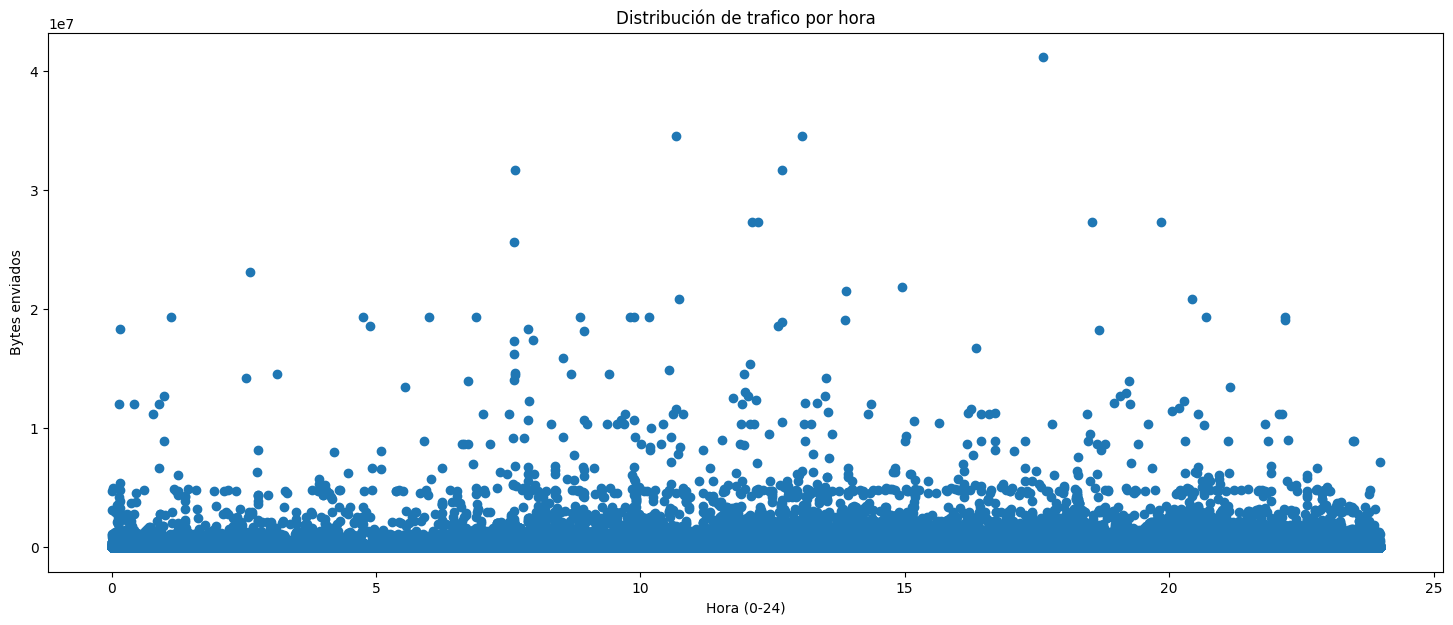

In [7]:
plt.rcParams['figure.figsize'] = [18, 7]
plot = plt.scatter( data[:,0],data[:,1] )
plt.title('Distribución de trafico por hora')
plt.xlabel('Hora (0-24)')
plt.ylabel('Bytes enviados')

In [8]:
print(f"Mínimo {min(data[:,1])}")

Mínimo 0.0


In [9]:
print(f"Máximo {max(data[:,1])}")

Máximo 41148667.0


In [10]:
df.query("body_bytes_sent == 41148667")

,remote_addr,remote_usr,date_time,date,time,request,req_method,req_uri,http_ver,status,...,user_agent,dec_req_uri,clean_path,clean_query_list,domain,fdate,dateunixtimest,ftime,fabstime,fdatetime
277504,187.232.247.32,-,[16/Jun/2023:17:37:56 -0600],16/Jun/2023,17:37:56,"""GET /api/backup/6477e50d58961a00fb5b5e4e HTTP...",GET,/api/backup/6477e50d58961a00fb5b5e4e,HTTP/1.1,200.0,...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,/api/backup/6477e50d58961a00fb5b5e4e,/api/backup/6477e50d58961a00fb5b5e4e,[],dbmanager.designa.mx,2023-06-16,1.686874e+09,17:37:56,17.616667,2023-06-16 17:37:56


Únicamente basado en este análisis, hace sentido que el máximo sea de 41 Mb ya que se trata de un endpoint de respaldos de bases de datos. 

### Predicción

In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression

x=np.array(df["fabstime"]).reshape(-1,1)
y=df["body_bytes_sent"]

reg = LinearRegression().fit(x,y)

print(f"Coeficiente (Tetha 1){reg.coef_}")

print(f"Intercepto (Tetha 0) {reg.intercept_}")


Coeficiente (Tetha 1)[14.94249052]
Intercepto (Tetha 0) 33099.42628725361


In [12]:
print(f"Ecuación: y={reg.intercept_} + {reg.coef_[0]}x")

Ecuación: y=33099.42628725361 + 14.942490519986485x


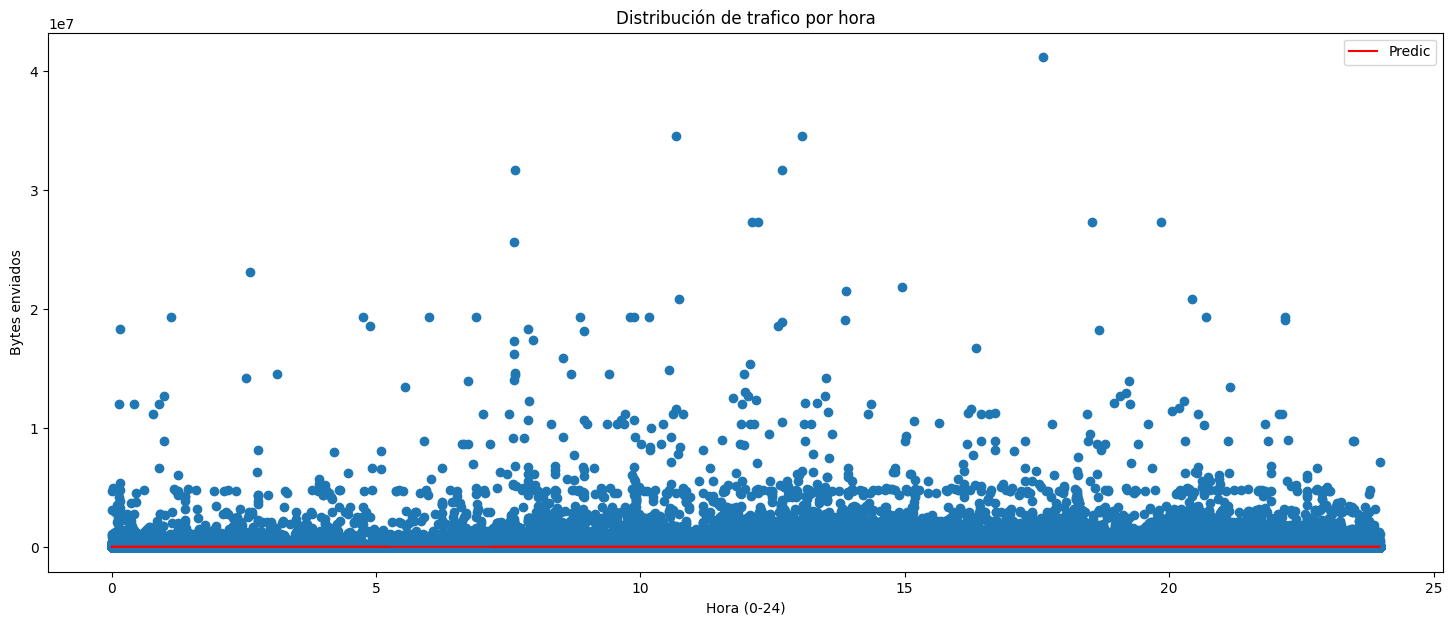

In [13]:
y_pred = reg.predict(np.array(df["fabstime"]).reshape(-1,1))


#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
plt.locator_params(axis='y')
plt.scatter(df["fabstime"], df["body_bytes_sent"])

plt.plot(x, y_pred, c='red', label = 'Predic')

plt.title('Distribución de trafico por hora')
plt.xlabel('Hora (0-24)')
plt.ylabel('Bytes enviados')
plt.legend()
plt.show()

En este caso no hace tanto sentido una predicción porque se cuenta únicamente con 24 horas, pero la interpretación sería, concatenar multiples días seguidos.

In [14]:
future = reg.predict(np.array(168).reshape(-1,1))
print(f"Predicción en hora 168, o en otras palabras predicción 7 días después: {future[0]} bytes enviados")

Predicción en hora 168, o en otras palabras predicción 7 días después: 35609.764694611345 bytes enviados


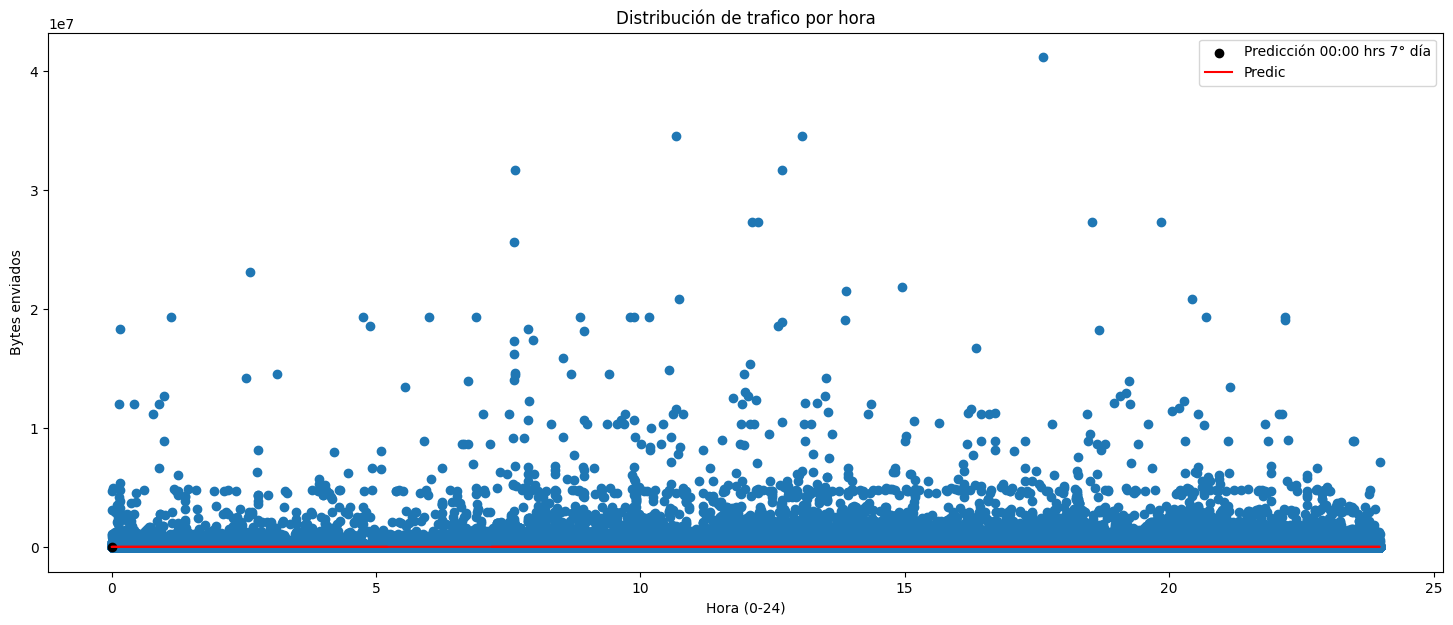

In [15]:
y_pred = reg.predict(np.array(df["fabstime"]).reshape(-1,1))


#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [18, 7]
plt.locator_params(axis='y')
plt.scatter(df["fabstime"], df["body_bytes_sent"])
plt.scatter(0, 35609, c="black", label= 'Predicción 00:00 hrs 7° día')

plt.plot(x, y_pred, c='red', label = 'Predic')

plt.title('Distribución de trafico por hora')
plt.xlabel('Hora (0-24)')
plt.ylabel('Bytes enviados')
plt.legend()
plt.show()

Si bien este es el dato generado mediante la regresión lineal, me parece importante destacar que puede ser un poco tendencioso, el comportamiento de los datos usualmente es ciclico por lo que representarlo en una línea puede ser una estimación poco confiable.

In [16]:
# Obtenemos el punto de separación entre el primer y último cuartil
low, high = df["body_bytes_sent"].quantile([0.10,0.90])
print(f"Corte mínimo: {low}, Corte máximo: {high}")
#df.query('{low}<body_bytes_sent<{high}'.format(low=low,high=high))

Corte mínimo: 6.0, Corte máximo: 76998.0


In [17]:
len(df.query("body_bytes_sent < 6.0")["body_bytes_sent"])

91396

In [18]:
len(df.query("body_bytes_sent > 76998")["body_bytes_sent"])

101690

In [19]:
x=np.array(df["fabstime"]).reshape(-1,1)
y_min=df.query("body_bytes_sent < 226.0")["body_bytes_sent"]

reg_min = LinearRegression().fit(x,y)

print(f"Coeficiente (Tetha 1){reg_min.coef_}")

print(f"Intercepto (Tetha 0) {reg_min.intercept_}")

Coeficiente (Tetha 1)[14.94249052]
Intercepto (Tetha 0) 33099.42628725361


In [20]:
x=np.array(df["fabstime"]).reshape(-1,1)
y_max=df.query("body_bytes_sent > 18821")["body_bytes_sent"]

reg_max = LinearRegression().fit(x,y)

print(f"Coeficiente (Tetha 1){reg_max.coef_}")

print(f"Intercepto (Tetha 0) {reg_max.intercept_}")

Coeficiente (Tetha 1)[14.94249052]
Intercepto (Tetha 0) 33099.42628725361


En este caso a pesar de realizar cortes con el 10% máximo y mínimo los datos estan tan densos y tienen una desviación pequeña que las regresiones quedan iguales

In [21]:
print(f"Corte mínimo: {low}, Corte máximo: {high}")

Corte mínimo: 6.0, Corte máximo: 76998.0
